In [2]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

1. Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
- Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
- Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
- Исключим стоп-слова с помощью stop_words='english'. 
- Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().


In [3]:
df = pd.read_pickle('preprocessed_tweets.pkl')

In [4]:
df.head()

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,model love yoyou take with yoyou all the time ...,"[model, love, yoyou, take, with, yoyou, all, t...","[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, yoyou, time, yoyour]"
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


In [5]:
tweet_stemmed = [' '.join(i) for i in df.tweet_stemmed]
tweet_lemmatized = [' '.join(i) for i in df.tweet_lemmatized]

In [6]:
vectorizer = CountVectorizer(
    max_df=0.9, 
    max_features=1000, 
    stop_words='english',    
)
bag_of_stemmed_words = vectorizer.fit_transform(tweet_stemmed)
stemmed_features = vectorizer.get_feature_names()
bag_of_tweet_lemmatized_words = vectorizer.fit_transform(tweet_lemmatized)
lemmatized_features = vectorizer.get_feature_names()

In [7]:
pd.DataFrame(bag_of_stemmed_words.toarray(), columns=stemmed_features).head()

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yo,yoga,york,young,youtub,yoyou,yoyour,yoyoy,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
pd.DataFrame(bag_of_tweet_lemmatized_words.toarray(), columns=lemmatized_features).head()

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,...,yo,yoga,york,young,youtube,yoyou,yoyour,yoyoyou,yr,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
- Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
- Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
- Исключим стоп-слова с помощью stop_words='english'.
- Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().


In [9]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.9, 
    max_features=1000, 
    stop_words='english',    
)
bag_of_stemmed_words_tfidf = tfidf_vectorizer.fit_transform(tweet_stemmed)
stemmed_features_tfidf = tfidf_vectorizer.get_feature_names()
bag_of_tweet_lemmatized_words_tfidf = tfidf_vectorizer.fit_transform(tweet_lemmatized)
lemmatized_features_tfidf = tfidf_vectorizer.get_feature_names()

In [10]:
pd.DataFrame(bag_of_stemmed_words_tfidf.toarray(), columns=stemmed_features).head()

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yo,yoga,york,young,youtub,yoyou,yoyour,yoyoy,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.744148,0.392399,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [11]:
pd.DataFrame(bag_of_tweet_lemmatized_words_tfidf.toarray(), columns=lemmatized_features_tfidf).head()

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,...,yo,yoga,york,young,youtube,yoyou,yoyour,yoyoyou,yr,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.742113,0.39173,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0


3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же 

In [12]:
with open('corpus') as f:
    data = f.read()
    labels, texts = [], []
    for i, line in enumerate(data.split("\n")):
        content = line.split()
        labels.append(content[0])
        texts.append(" ".join(content[1:]))

trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels
trainDF.head(5)

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


In [13]:
from sklearn.preprocessing import Normalizer, MinMaxScaler

In [14]:
from sklearn import model_selection, preprocessing, linear_model
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(
    trainDF['text'],
    trainDF['label']
)

# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)


# count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect = vectorizer
count_vect.fit(trainDF['text'])
normalizer = Normalizer()
xtrain_count = normalizer.fit_transform(count_vect.transform(train_x))
xvalid_count =  normalizer.transform(count_vect.transform(valid_x))
# xtrain_count =  count_vect.transform(train_x)
# xvalid_count =  count_vect.transform(valid_x)

classifier = linear_model.LogisticRegression()
classifier.fit(xtrain_count, train_y)
predictions = classifier.predict(xvalid_count)
predictions

array([1, 0, 0, ..., 1, 0, 0])

In [15]:
accuracy_score(valid_y, predictions)

0.8308

In [16]:
def vectorizers_cv(vectorizer, max_dfs=[.98], min_dfs=[1], max_features=[2050], cv=1, n_components=-1):
    scores = []
    if isinstance(n_components, int):
        n_components = [0]
        flag = 0
    for max_df in max_dfs:
        for min_df in min_dfs:
            for max_feature in max_features:
                accuracy = []
                for n_component in n_components:
                    for i in range(cv):
                        train_x, valid_x, train_y, valid_y = model_selection.train_test_split(
                                trainDF['text'],
                                trainDF['label']
                            )
                        encoder = preprocessing.LabelEncoder()
                        train_y = encoder.fit_transform(train_y)
                        valid_y = encoder.fit_transform(valid_y)

                        count_vect = vectorizer(
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_feature, 
                        stop_words='english',    
                        )
                        count_vect.fit(trainDF['text'])
                        normalizer = Normalizer()
                        xtrain_count = normalizer.fit_transform(count_vect.transform(train_x))
                        xvalid_count =  normalizer.transform(count_vect.transform(valid_x))
                        if n_components[0] :
                            pca = TruncatedSVD(n_component)
                            xtrain_count = pca.fit_transform(xtrain_count)
                            xvalid_count = pca.transform(xvalid_count)
                        classifier = linear_model.LogisticRegression()
                        classifier.fit(xtrain_count, train_y)
                        predictions = classifier.predict(xvalid_count)
                        accuracy.append(accuracy_score(valid_y, predictions))
                    # scores.append((accuracy, max_df, min_df, max_feature))
                    scores.append((np.array(accuracy).mean(), max_df, min_df, max_feature, n_component))
    
    return np.array(scores)


In [17]:
max_features = np.linspace(100, 2000, 20, dtype='int32')

Text(0, 0.5, 'accuracy')

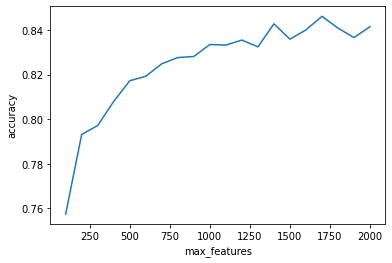

In [18]:
result = vectorizers_cv(CountVectorizer, max_features=max_features, cv=5)
plt.plot(result[:,3],result[:,0])
plt.xlabel('max_features')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

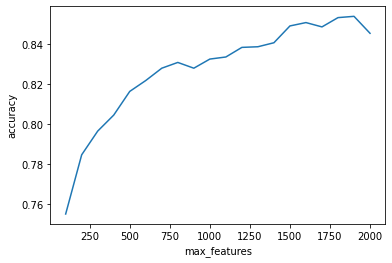

In [19]:
result = vectorizers_cv(TfidfVectorizer, max_features=max_features, cv=5)
plt.plot(result[:,3],result[:,0])
plt.xlabel('max_features')
plt.ylabel('accuracy')

In [20]:
min_dfs = np.linspace(0.000000000001, 0.2, 20)


Text(0, 0.5, 'accuracy')

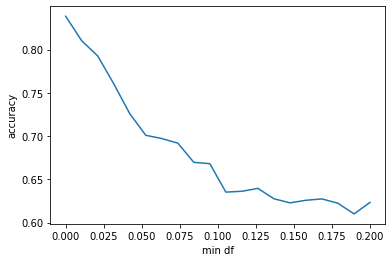

In [21]:
result = vectorizers_cv(CountVectorizer, min_dfs=min_dfs, cv=5)
plt.plot(result[:,2],result[:,0])
plt.xlabel('min df')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

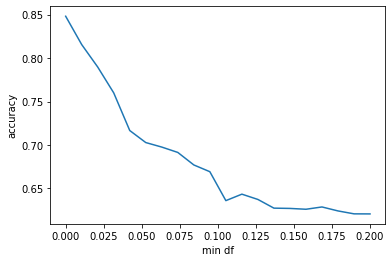

In [22]:
result = vectorizers_cv(TfidfVectorizer, min_dfs=min_dfs, cv=5)
plt.plot(result[:,2],result[:,0])
plt.xlabel('min df')
plt.ylabel('accuracy')

In [23]:
max_dfs = [0.001*1.5**i for i in range(17)]

Text(0, 0.5, 'accuracy')

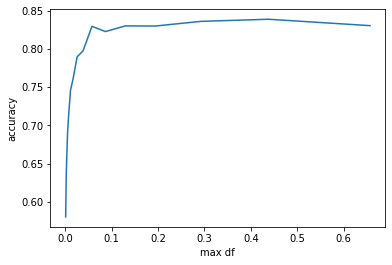

In [24]:
result = vectorizers_cv(CountVectorizer, max_dfs=max_dfs, cv=5)
plt.plot(result[:,1],result[:,0])
plt.xlabel('max df')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

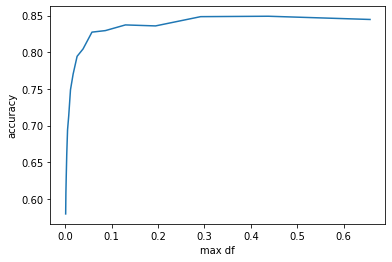

In [25]:
result = vectorizers_cv(TfidfVectorizer, max_dfs=max_dfs, cv=5)
plt.plot(result[:,1],result[:,0])
plt.xlabel('max df')
plt.ylabel('accuracy')

max_features - чем больше тем лучше хотя 250 уже не так плохо.

min_df - чем меньше тем лучше

max_df - чем больше те м лучше

CountVectorizer работает буквально на пару процентов хуже чем TfidfVectorizer, но незначительно.

# PCA

In [27]:
n_components = [2**i for i in range(12)]
n_components.reverse()

In [28]:
result = vectorizers_cv(CountVectorizer, n_components=n_components, cv=5)

In [30]:
result

array([[8.41840000e-01, 9.80000000e-01, 1.00000000e+00, 2.05000000e+03,
        2.04800000e+03],
       [8.36240000e-01, 9.80000000e-01, 1.00000000e+00, 2.05000000e+03,
        1.02400000e+03],
       [8.34986667e-01, 9.80000000e-01, 1.00000000e+00, 2.05000000e+03,
        5.12000000e+02],
       [8.31280000e-01, 9.80000000e-01, 1.00000000e+00, 2.05000000e+03,
        2.56000000e+02],
       [8.26784000e-01, 9.80000000e-01, 1.00000000e+00, 2.05000000e+03,
        1.28000000e+02],
       [8.18546667e-01, 9.80000000e-01, 1.00000000e+00, 2.05000000e+03,
        6.40000000e+01],
       [8.07554286e-01, 9.80000000e-01, 1.00000000e+00, 2.05000000e+03,
        3.20000000e+01],
       [7.96160000e-01, 9.80000000e-01, 1.00000000e+00, 2.05000000e+03,
        1.60000000e+01],
       [7.83937778e-01, 9.80000000e-01, 1.00000000e+00, 2.05000000e+03,
        8.00000000e+00],
       [7.68416000e-01, 9.80000000e-01, 1.00000000e+00, 2.05000000e+03,
        4.00000000e+00],
       [7.46778182e-01, 9.8000

Text(0, 0.5, 'accuracy')

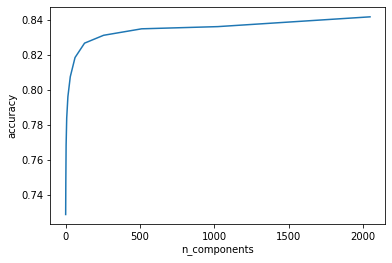

In [29]:
plt.plot(result[:,4],result[:,0])
plt.xlabel('n_components')
plt.ylabel('accuracy')

PCA работает очень хорошо, при переводе даже в 2 фичи, результат порядка 74% точности что очень может ускорить работу алгоритма.